<a href="https://colab.research.google.com/github/parul21/data_analyrics/blob/master/iris_data_cf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.naive_bayes import GaussianNB


In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [0]:
 iris = datasets.load_iris()
 X = iris.data
 y = iris.target

In [0]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
gaussian_nb = GaussianNB()

In [0]:
y_pred_NB = gaussian_nb.fit(X_train, y_train).predict(X_test)
print(y_pred_NB)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


**knn**

In [0]:
#knn
print("Target names: {}".format(iris['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [0]:
print("Feature names: {}".format(iris['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
print("Type of data: {}".format(type(iris['data'])))

Type of data: <class 'numpy.ndarray'>


In [0]:
print("First five rows of data:\n{}".format(iris['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [0]:
print("Type of target: {}".format(type(iris['target'])))

Type of target: <class 'numpy.ndarray'>


In [0]:
print("Target: \n{}".format(iris['target']))


Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (105, 4)
y_train shape: (105,)


In [0]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (45, 4)
y_test shape: (45,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np 

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)

In [0]:
knn.fit(X_train, y_train)#build the model from the training set

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
x_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(x_new.shape))

X_new.shape: (1, 4)


In [0]:
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [0]:
y_pred = knn.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))## run the test data set through the model to determine predictions =

Test set predictions: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [0]:
print("Test set score: {:.2f}".format(np.mean(y_pred==y_test)))
print("Test set score: {:2f}".format(knn.score(X_test, y_test)))

Test set score: 0.98
Test set score: 0.977778


**decision tree**

In [0]:
 from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

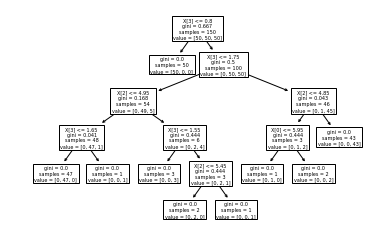

In [0]:
tree=tree.plot_tree(clf.fit(iris.data, iris.target))

**confusion matrix**

In [0]:
 y_pred_gaussian_nb = gaussian_nb.fit(X_train, y_train).predict(X_test)
 cnf_matrix_gnb = confusion_matrix(y_test,  y_pred_gaussian_nb)

In [0]:
 print(cnf_matrix_gnb)

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


**roc**

In [0]:
import pylab as pl
from sklearn import svm, datasets
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc


In [0]:
# Run classifier
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)


In [0]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.797101


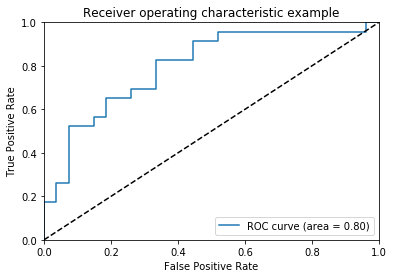

In [0]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [0]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, y)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

ValueError: ignored